# Lineære Systemer av Differensialligninger (MIP 11.1)

In [1]:
try:
    import python_linear_algebra
except:
    !pip install python_linear_algebra@git+https://github.com/mbr085/python_linear_algebra
    import python_linear_algebra
    

In [2]:
import numpy as np
from python_linear_algebra.matrix_reduction import skriv_ut_egenvektorer_og_multiplikasjon_med_matrise
from python_linear_algebra.matrix_reduction import skriv_ut_numpy_egenvektorer_og_multiplikasjon_med_matrise
from python_linear_algebra.matrix_reduction import finn_egenvektorer_og_egenverdier
from python_linear_algebra.matrix_reduction import gauss_jordan
from python_linear_algebra.matrix_reduction import invers_matrise
import matplotlib.pyplot as plt

Et eksempel på **et system av lineære differensialligninger i kjemi** oppstår i **laserkjemi**, spesielt i samspillet mellom molekyler og lys. Et kjent tilfelle er **vibrasjons- eller elektronisk populasjonsdynamikk i eksiterte tilstander**.  

---

### **Eksempel: System av lineære differensialligninger i laserindusert fluorescens (LIF)**  
Når et molekyl absorberer en foton fra en laser, blir det eksitert til en høyere elektronisk eller vibrasjonsmessig tilstand. Populasjonen av molekyler i den eksiterte tilstanden utvikler seg over tid på grunn av:

1. **Spontan emisjon** – Molekylet går tilbake til grunntilstanden ved å sende ut en foton.  
2. **Stimuleret emisjon** – En annen foton med samme energi kan indusere molekylet til å sende ut lys.  
3. **Ikke-radiativ relaksasjon** – Molekylet mister energi uten å sende ut lys (f.eks. via kollisjoner eller intern konvertering).
4. **Eksitasjon** – Et molekyl i grunntillstanden absorberer en foton og går til den eksiterte tilstanden.  

**Rate-ligningene** som beskriver disse overgangene, er et eksempel på **populasjonsdynamikk** i kjemi. Dette modelleres ofte ved hjelp av **Boltzmann-fordelingen** eller **rate-ligninger som Einstein-koeffisientene**.  

Denne typen populasjonsdynamikk er avgjørende for å forstå **reaksjonskinetikk, spektroskopi og fotokjemi**.

### **Kontinuerlig tids populasjonsdynamikk med en overgangsmatrise**  
Vi 
uttrykker populasjonsutviklingen som:  

$$
\frac{d}{dt} \vec v(t) = A \cdot \vec v(t)
$$

hvor:

- $ \vec v(t) = \begin{bmatrix} v_g(t) \\ v_e(t) \end{bmatrix} $ representerer populasjonene ved tidspunkt $ t $.
- $ \frac {d}{dt} \vec v(t) = \begin{bmatrix} \frac{d}{dt}v_g(t) \\ \frac{d}{dt}v_e(t) \end{bmatrix} $ representerer endringsratene til populasjonene ved tidspunkt $ t $. (Husk at $\frac{d}{dt} f(t) = f'(t)$.)
- $ A $ er **overgangsmatrisen**, som bestemmer hvordan populasjonene endrer seg over tid.

Et enkelt valg for $ A $ er:

$$
A = \begin{bmatrix} 
- p & q \\ 
p & - q 
\end{bmatrix}
$$

hvor:
- $ p $ er sannsynligheten for overgang fra grunntilstanden til den eksiterte tilstanden per tidssteg.
- $ q $ er sannsynligheten for overgang fra den eksiterte tilstanden til grunntilstanden per tidssteg.

---

En **likevektstilstand**, er en tilstand $\vec w = \begin{bmatrix}w_g \\ w_e\end{bmatrix}$ slik at

$$
A \cdot \vec w = \vec 0
$$

For å finne likevektstilstandene løser vi:
$$
\begin{bmatrix} 
- p & q \\ 
p & - q 
\end{bmatrix}
\begin{bmatrix} w_g \\ w_e \end{bmatrix}
=
\begin{bmatrix} 0 \\ 0 \end{bmatrix}.
$$

Bemert at hvis $\vec v(0) = \vec w$ er en likevektstilstand, da er funksjonen $\vec v (t) = \vec w$ en løsning til differensialligningssystemet $\frac{d}{dt} \vec v(t) = A \cdot \vec v(t)$.

For å finne en likevektstilstand gjør vi Gauss Jordan radeliminasjon på matrisen $A$:

$$A 
=
\begin{bmatrix} -p & q \\ p & -q \end{bmatrix}
\sim
\begin{bmatrix} p & -q \\ 0 & 0 \end{bmatrix}
.
$$

Her er andre parameter $w_e$ fri, og $pw_g - qw_e = 0$ slik at 
$$\frac{w_e}{w_g} = \frac{p}{q}$$

Det vil si at $w_g = q$ og $w_e = p$ gir en likevektstilstand $\vec w = \begin{bmatrix}q \\ p\end{bmatrix}$.

Vi har sett at egenverdier og egenvektorer kan være nyttige. Her er  $\vec w = \begin{bmatrix}q \\ p\end{bmatrix}$ en egenvektor for $A$ med tilhørende egenverdi $1$.

Fra analysen vi gjorde av matrisedynamikk kan vi også finne egenvektorer og egenverdier til matrisen $A$. Vi så at matrisen
$$I + A = \begin{bmatrix} 
1 - p & q \\ 
p & 1 - q 
\end{bmatrix}$$

Har egenverdiene $1$ og $1-(p+q)$. 

## Oppgave

Forklar hvorfor egenverdiene til $A$ er $0$ og $-(p+q)$.

---

## Oppgave

Finn en egenvektor $\vec u$ for $A$ med egenverdi $-(p+q)$.

## Oppgave

La $v(t) = e^{-(p+q) t} \vec u$. Sjekk at 
$\vec v(t)$ er en løsning til $\frac{d}{dt} \vec v(t) = A \cdot \vec v(t)$ med $\vec v(0) = \vec u$.

## Oppgave

La $x$ og $y$ være to tall og la $\vec v(t) = x\cdot e^{-(p+q)t} \cdot \vec u + y\cdot \vec w$. Sjekk at $\vec v(t)$ er en løsning til $\frac{d}{dt} \vec v(t) = A \cdot \vec v(t)$ med
$\vec v(0) = x \cdot \vec u + y \cdot \vec w$.

## Oppgave

La $A$ være en 2 x 2 matrise med egenverdier $\lambda_1$ og $\lambda_2$ og egenvektorer $\vec w_1$ og $\vec w_2$ med 
$A \cdot \vec w_1 = \lambda_1 \cdot \vec w_1$ og $A \cdot \vec w_2 = \lambda_2 \cdot \vec w_.$

La $x$ og $y$ være to tall og la $\vec v(t) = x\cdot e^{\lambda_1 t} \cdot \vec w_1 + y \cdot e^{\lambda_2 t} \cdot \vec w_2$. Sjekk at $\vec v(t)$ er en løsning til $\frac{d}{dt} \vec v(t) = A \cdot \vec v(t)$ med
$\vec v(0) = x \cdot \vec w_1 + y \cdot \vec w_2$.

## Oppgave

La 
$A=\begin{bmatrix}-1 & 2\\-3 &4\end{bmatrix}$ og la $\vec v_0 = \begin{bmatrix}1\\0\end{bmatrix}$. Finn en løsning til differensialligningssystemet $\frac{d}{dt} \vec v(t) 
= A \cdot \vec v(t)$ med $\vec v(0) = \vec v_0$ ved at følge stegene under.

1. Finn egenverdier $\lambda_1$ og $\lambda_2$ for $A$ og egenvektorer $\vec w_1$ og $\vec w_2$ med $A \cdot \vec w_1 = \lambda_1 \cdot \vec w_1$ og $A \cdot \vec w_2 = \lambda_2 \cdot \vec w_2.$
2. Finn tall $x$ og $y$ slik at $\vec v_0 = x \cdot \vec w_1 + y \cdot \vec w_2$.
3. Sjekk at $\vec v(t) = x\cdot e^{\lambda_1 t} \cdot \vec w_1 + y \cdot e^{\lambda_2 t} \cdot \vec w_2$ er en løsning til $\frac{d}{dt} \vec v(t) = A \cdot \vec v(t)$ med
$\vec v(0) = \vec v_0$.


# Tonivåsystem i Natrium (Na)

Natriumatomer har en kjent elektronisk overgang:  
- **Grunntilstand:** $ 3s $  
- **Eksitert tilstand:** $ 3p $  

Dette gir en typisk LIF-prosess:  
$$
3s \xrightarrow{\text{Laser}} 3p \xrightarrow{\text{Fluorescens}} 3s + h\nu
$$
hvor atomet emitterer lys med bølgelengde **589 nm** (den gule natrium D-linjen).  

---

For en kraftig laser er 
p = 0.2 og q = 0.5 i overgangsmatrisen realistiske verdier hvis tid regnes i enheter av nanosekunder slik at
$$
A = \begin{bmatrix} 
- 0.02 & 0.05 \\ 
0.02 & - 0.05 
\end{bmatrix}
$$
som før Finn egenverdier $\lambda_1$ og $\lambda_2$ for $A$ og egenvektorer $\vec w_1$ og $\vec w_2$ med $A \cdot \vec w_1 = \lambda_1 \cdot \vec w_1$ og $A \cdot \vec w_2 = \lambda_2 \cdot \vec w_2.$

In [3]:
p = 0.02 # (2 % av molekylene går til eksitert tilstand per steg).
q = 0.05 # (5 % av molekylene slapper av tilbake per steg).

A = np.array([
    [- p, q],
    [p, - q]
])

In [4]:
skriv_ut_egenvektorer_og_multiplikasjon_med_matrise(A, finn_egenvektorer_og_egenverdier(A))

Alle vektorer her skal leses som kolonnevektorer

egenverdi:      0.0
egenvektor:     [2.5 1. ]
A @ evenvektor: [ 1.735e-18 -1.735e-18]

egenverdi:      -0.07
egenvektor:     [-1.  1.]
A @ evenvektor: [ 0.07 -0.07]



In [5]:
(lambda2, _, (w2,)), (lambda1, _, (w1,)) = finn_egenvektorer_og_egenverdier(A)

La oss si at vi har en starttilstand $\vec v(0) = \begin{bmatrix}1\\0\end{bmatrix}$ der alle atomer er i grunntilstanden. Vi finner $x$ og $y$ slik at 
$\vec v(0) = x \vec w_1 + y \vec w_2$.

In [6]:
v0 = np.array([[1],[0]])
M = np.hstack([w1, w2, v0])

In [7]:
M

array([[ 2.5, -1. ,  1. ],
       [ 1. ,  1. ,  0. ]])

In [8]:
gauss_jordan(M)

array([[ 1.        ,  0.        ,  0.28571429],
       [ 0.        ,  1.        , -0.28571429]])

In [9]:
x, y = gauss_jordan(M)[:, -1]

In [10]:
t = np.linspace(0, 100, 100)
v = x * np.exp(lambda1 * t) * w1 + y * np.exp(lambda2 * t) * w2

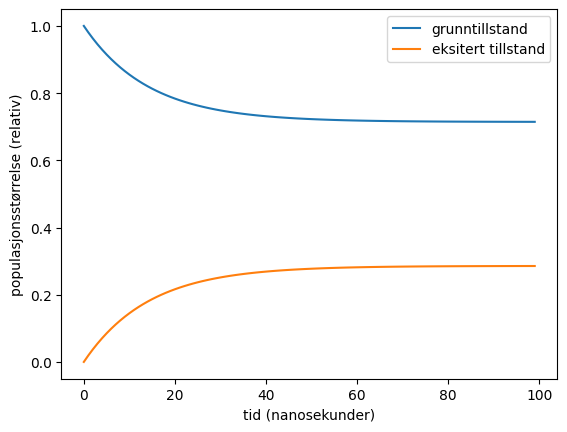

In [11]:
plt.plot(v[0], label='grunntillstand')
plt.plot(v[1], label='eksitert tillstand')
plt.xlabel('tid (nanosekunder)')
plt.ylabel('populasjonsstørrelse (relativ)')
plt.legend()

## Oppgave

Bruk koden over til å skrive en python funksjon med følgende beskrivelse:

```python
def løs_homogent_system_av_differensialligninger(overgangsmatrise, starttilstand, tverdier):
    '''
    Løser et homogent lineært system av differensialligninger analytisk
    
    Parametre:
        overgangsmatrise (np.ndarray): En kvadratisk Numpy-array med koeffisientene for systemet
        starttilstand (np.ndarray): En 1D Numpy-array av samme lengde som overgangsmatrise
        tverdier (np.ndarray): En 1D Numpy-array med verdier av t der løsningen skal beregnes
    
    Retunerer:
        y (np.ndarray): Verdiene av løsningen til sistemet i de angitte tverdier
    '''
```

# Trenivåsystem i Natrium (Na)

Natrium har en grunntilstand ($3s$) og eksiterte tilstander ($3p$ og $4s$), som kan brukes til å konstruere et trenivåsystem av typen "kaskade" (ladder-type):

1. **Grunntilstand ($3s$)**: $|1\rangle$
2. **Første eksiterte tilstand ($3p$)**: $|2\rangle$
3. **Andre eksiterte tilstand ($4s$)**: $|3\rangle$

Overgangene mellom disse tilstandene er:
- $|1\rangle \leftrightarrow |2\rangle$: Tilsvarer D-linjeovergangen (bølgelengde ~589 nm).
- $|2\rangle \leftrightarrow |3\rangle$: Tilsvarer en høyenergetisk overgang (bølgelengde ~330 nm).

---

## Rate-ligninger for Natrium Kaskadesystemet

La oss definere populasjonene i de tre tilstandene som $n_1$, $n_2$, og $n_3$. Rate-ligningene for dette systemet er:

$$
\frac{dn_1}{dt} = W_{21} n_2 + W_{31} n_3 - (W_{12} + W_{13}) n_1,
$$
$$
\frac{dn_2}{dt} = W_{12} n_1 + W_{32} n_3 - (W_{21} + W_{23}) n_2,
$$
$$
\frac{dn_3}{dt} = W_{13} n_1 + W_{23} n_2 - (W_{31} + W_{32}) n_3.
$$

Her:
- $W_{12}$: Overgangshastighet fra $|1\rangle$ til $|2\rangle$ (eksitasjon med en laser på 589 nm).
- $W_{21}$: Overgangshastighet fra $|2\rangle$ til $|1\rangle$ (spontan emisjon på 589 nm).
- $W_{23}$: Overgangshastighet fra $|2\rangle$ til $|3\rangle$ (eksitasjon med en laser på 330 nm).
- $W_{32}$: Overgangshastighet fra $|3\rangle$ til $|2\rangle$ (spontan emisjon på 330 nm).
- $W_{13}$: Overgangshastighet fra $|1\rangle$ til $|3\rangle$ (eksitasjon med en laser på 919 nm).
- $W_{31}$: Overgangshastighet fra $|3\rangle$ til $|1\rangle$ (spontan emisjon eller ikke-radiativ nedgang).

---

## Typiske Overgangshastigheter

For natrium:
- Den spontane emisjonsraten $W_{21}$ (for $3p \to 3s$) er omtrent $6 \times 10^7 \, \text{s}^{-1}$.
- Den spontane emisjonsraten $W_{32}$ (for $4s \to 3p$) er omtrent $1 \times 10^7 \, \text{s}^{-1}$.
- Eksitasjonsratene $W_{12}$ og $W_{23}$ avhenger av laserintensiteten og kan beregnes ved hjelp av Einstein-koeffisienter eller eksperimentelle data.

---

## Numerisk Eksempel

La oss anta følgende overgangshastigheter (i enheter av $10^7 \, \text{s}^{-1}$):
- $W_{12} = 5.0$ (eksitasjon $|1\rangle \to |2\rangle$)
- $W_{21} = 6.0$ (spontan emisjon $|2\rangle \to |1\rangle$)
- $W_{23} = 3.0$ (eksitasjon $|2\rangle \to |3\rangle$)
- $W_{32} = 1.0$ (spontan emisjon $|3\rangle \to |2\rangle$)
- $W_{13} = 0.1$ (svak eksitasjon $|1\rangle \to |3\rangle$)
- $W_{31} = 0.5$ (spontan emisjon $|3\rangle \to |1\rangle$)

Rate-matrisen $\mathbf{A}$ blir:

$$
\mathbf{A} =
\begin{bmatrix}
-(5.0 + 0.1) & 6.0 & 0.5 \\
5.0 & -(6.0 + 3.0) & 1.0 \\
0.1 & 3.0 & -(1.0 + 0.5)
\end{bmatrix}
\times 10^7 \, \text{s}^{-1}.
$$

---

Vi lager en funksjon som løser homogene systemer av differensialligninger for oss:

In [12]:
def løs_homogent_system_av_differensialligninger(overgangsmatrise, starttilstand, tverdier):
    '''
    Løser et homogent lineært system av differensialligninger analytisk
    
    Parametre:
        overgangsmatrise (np.ndarray): En kvadratisk Numpy-array med koeffisientene for systemet
        starttilstand (np.ndarray): En 1D Numpy-array av samme lengde som overgangsmatrise
        tverdier (np.ndarray): En 1D Numpy-array med verdier av t der løsningen skal beregnes
    
    Retunerer:
        y (np.ndarray): Verdiene av løsningen til sistemet i de angitte tverdier
    '''
    egenvektorer_og_egenverdier = finn_egenvektorer_og_egenverdier(overgangsmatrise)
    egenverdier = np.array([[x[0]] for x in egenvektorer_og_egenverdier])
    P = np.hstack([x[2][0] for x in egenvektorer_og_egenverdier])
    return P @ ((invers_matrise(P) @ starttilstand[:, None]) * np.exp(tverdier[None, :] * egenverdier))

In [13]:
# Definer rate-matrisen A (i enheter av 10^7 s^-1)
A = np.array([
    [-(5.0 + 0.1), 6.0, 0.5],
    [5.0, -(6.0 + 3.0), 1.0],
    [0.1, 3.0, -(1.0 + 0.5)]
]) * 1e-2  # Konverter til s^-1
n0 = np.array([1,0,0])

In [14]:
t = np.linspace(0, 300, 500)

In [15]:
v = løs_homogent_system_av_differensialligninger(overgangsmatrise=A, starttilstand=n0, tverdier=t)

Text(0.5, 1.0, 'Populasjonsdynamikk i et Natrium Trenivåsystem')

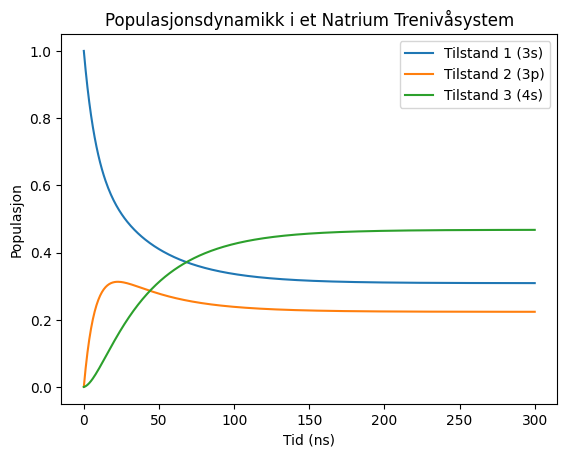

In [16]:
plt.plot(t, v[0, :])
plt.plot(t, v[1, :])
plt.plot(t, v[2, :])
plt.xlabel('Tid (ns)')
plt.ylabel('Populasjon')
plt.legend(['Tilstand 1 (3s)', 'Tilstand 2 (3p)', 'Tilstand 3 (4s)'])
plt.title('Populasjonsdynamikk i et Natrium Trenivåsystem')

## Numerisk Løsning

Her er hvordan du kan løse dette systemet numerisk:

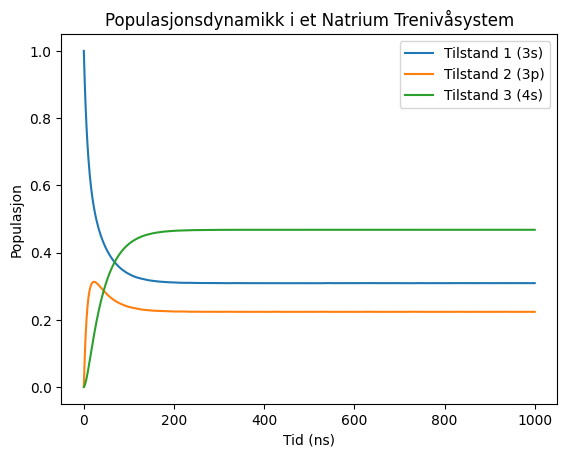

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definer rate-matrisen A (i enheter av 10^7 s^-1)
A = np.array([
    [-(5.0 + 0.1), 6.0, 0.5],
    [5.0, -(6.0 + 3.0), 1.0],
    [0.1, 3.0, -(1.0 + 0.5)]
]) * 1e7  # Konverter til s^-1

# Startpopulasjonsvektor (all populasjon i tilstand 1)
n0 = np.array([1.0, 0.0, 0.0])

# Definer systemet av ODE-er
def rate_equations(t, n):
    return A @ n

# Løs systemet
t_span = (0, 1e-6)  # Tidsrom i sekunder
sol = solve_ivp(rate_equations, t_span, n0, t_eval=np.linspace(0, 1e-6, 1000))

# Plott resultatene
plt.plot(sol.t * 1e9, sol.y.T)  # Konverter tid til nanosekunder
plt.xlabel('Tid (ns)')
plt.ylabel('Populasjon')
plt.legend(['Tilstand 1 (3s)', 'Tilstand 2 (3p)', 'Tilstand 3 (4s)'])
plt.title('Populasjonsdynamikk i et Natrium Trenivåsystem')
plt.show()

## Komplekse egenverdier

Hvis det karakteristiske polynomet til overgangsmatrisen $A$ ikke har like mange reelle røtter som graden av polynomet finnes komplekse røtter. For eksempel har polynomet $t^2 + 1$ av grad $2$ ingen reelle røtter. Det har derimot de to komplekse røtterne $\pm i$. Det vil si at $i^2 = (-i)^2 = -1$. Python kan regne med komplekse tall. Tallet $i$ skrives `1j`.

In [18]:
i = 1j
i * i

(-1+0j)

Hvis vi vil bruke `i * i` som et vanlig reelt tall kan vi bytte det ut med den reelle delen av tallet:

In [19]:
(i * i).real

-1.0

## Dempet svingning i fjær

Et eksempel på et homogent system av lineære differensialligninger kommer fra et lodd hengt opp i en fjær.

Overgangsmatrisen for dette systemet er på formen:

$$A = \begin{bmatrix}0&1\\-a&-b\end{bmatrix}$$

der $a > 0$ og $b \ge 0$.

### Oppgave

Sjekk at det karakteristiske polynomet til matrisen $A$ er
$$t^2 + b t + a$$

---

Røttene til dette polynomet er 
$$\frac{-b \pm \sqrt{b^2 - 4a}}{2}$$

Når $b^2 - 4a < 0$ finnes ingen reelle røtter. Derimot finnes to komplekse røtter.

La oss se hva som skjer når $a = 1$ og $b = 1$.

In [20]:
A = np.array([
    [0, 1],
    [-1, -1]
])

In [21]:
starttilstand = np.array([1, 0])
tverdier = np.linspace(0, 10, 100)

Hvis jeg kjører linjen under
```python
v = løs_homogent_system_av_differensialligninger(overgangsmatrise=A, starttilstand=starttilstand, tverdier=tverdier)
```
skjer dette:

```python
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[22], line 1
----> 1 v = løs_homogent_system_av_differensialligninger(overgangsmatrise=A, starttilstand=starttilstand, tverdier=tverdier)

Cell In[12], line 15, in løs_homogent_system_av_differensialligninger(overgangsmatrise, starttilstand, tverdier)
     13 egenvektorer_og_egenverdier = finn_egenvektorer_og_egenverdier(overgangsmatrise)
     14 egenverdier = np.array([[x[0]] for x in egenvektorer_og_egenverdier])
---> 15 P = np.hstack([x[2][0] for x in egenvektorer_og_egenverdier])
     16 return P @ ((invers_matrise(P) @ starttilstand[:, None]) * np.exp(tverdier[None, :] * egenverdier))

File ~/projects/V25MAT102/.venv/lib/python3.12/site-packages/numpy/_core/shape_base.py:367, in hstack(tup, dtype, casting)
    365     return _nx.concatenate(arrs, 0, dtype=dtype, casting=casting)
    366 else:
--> 367     return _nx.concatenate(arrs, 1, dtype=dtype, casting=casting)

ValueError: need at least one array to concatenate
```

**Æsj, dette var ikke bra!**

Problemet er at vi ikke regner ut komplekse egenverdier og egenvektorene dertil når overgangsmatrisen $A$ består av reelle tall.

En **løsning** på dette er å si til python at tallene i overgangsmatrisen skal oppfattes som komplekse tall:

In [22]:
A = np.array([
    [0, 1],
    [-1, -1]
]).astype(np.complex128)

In [23]:
v = løs_homogent_system_av_differensialligninger(overgangsmatrise=A, starttilstand=starttilstand, tverdier=tverdier)

/home/mbr085/projects/V25MAT102/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/mbr085/projects/V25MAT102/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Svingning i fjær')

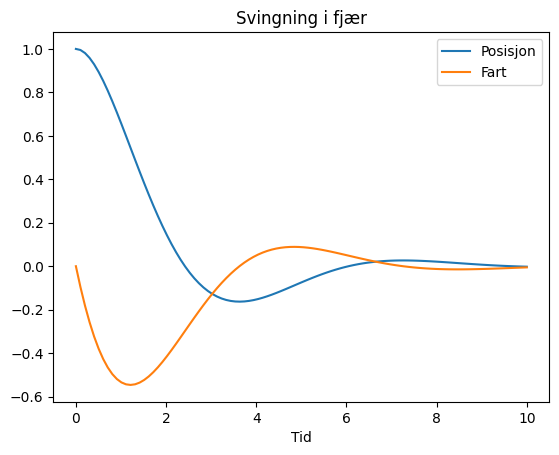

In [24]:
plt.plot(tverdier, v[0, :])
plt.plot(tverdier, v[1, :])
plt.xlabel('Tid')
plt.legend(['Posisjon', 'Fart'])
plt.title('Svingning i fjær')

La oss også se hva som skjer når $a = 1$ og $b = 0$:

In [25]:
A = np.array([
    [0, 1],
    [-1, 0]
]).astype(np.complex128)

In [26]:
v = løs_homogent_system_av_differensialligninger(overgangsmatrise=A, starttilstand=starttilstand, tverdier=tverdier)

Text(0.5, 1.0, 'Svingning i fjær')

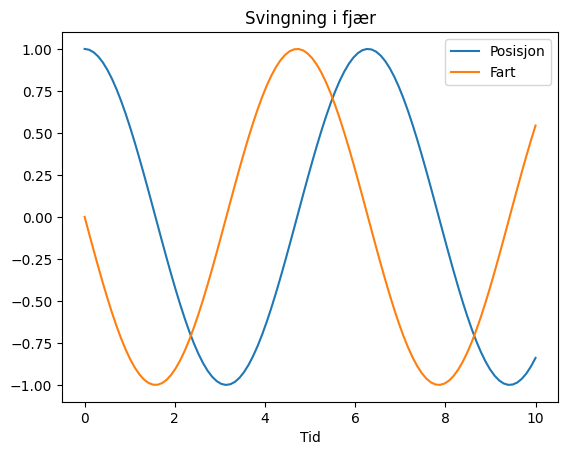

In [27]:
plt.plot(tverdier, v.real[0, :])
plt.plot(tverdier, v.real[1, :])
plt.xlabel('Tid')
plt.legend(['Posisjon', 'Fart'])
plt.title('Svingning i fjær')

**Advarsel** Hvis det karakteristiske polynomet er på formen $\det(A - tI) = (a_1 - t) \cdot (a_1 - t) \cdots (a_n - t)$ da må røttene $a_1, \dotsm a_n$ alle være forskjellige. Ellers feiler metoden vår. Det er mulig analytisk å løse tilfellet der røttene ikke alle er forskjellige, men det er litt knotet, så vi lar det ligge. 